In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping
import joblib

from sklearn.model_selection import train_test_split

def fine_tune_btc_model_v2(
    model_path,
    scaler_path,
    new_data_path,
    save_path,
    epochs,
    batch_size,
    plot_loss
):
    """
    Fine-tunes an existing BTC LSTM model using new data with train/test split.
    """

    # Load model and scaler
    model = load_model(model_path)
    scaler = joblib.load(scaler_path)

    # Load and preprocess new data
    df = pd.read_csv(new_data_path)
    df['Date'] = pd.to_datetime(df['Date'])
    prices = df[['Open']].values
    scaled_prices = scaler.transform(prices)

    # Create X and Y
    X = scaled_prices[:-1]
    Y = scaled_prices[1:]
    X = X.reshape((X.shape[0], 1, 1))

    # Train/test split
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

    # Recompile with same optimizer
    model.compile(optimizer='adam', loss='mse')

    # Early stopping
    early_stop = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

    # Fine-tune on training data, validate on test
    history = model.fit(
        X_train, Y_train,
        validation_data=(X_test, Y_test),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[early_stop],
        verbose=1
    )

    # Save updated model
    model.save(save_path)
    print(f"✅ Fine-tuned model saved as: {save_path}")

    # Save updated scaler
    new_scaler_path = scaler_path.replace(".save", "_v2.save")
    joblib.dump(scaler, new_scaler_path)
    print(f"✅ Updated scaler saved as: {new_scaler_path}")


    # Plot
    if plot_loss:
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title("Fine-tuning Loss Curve")
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()


Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 174ms/step - loss: 0.0131 - val_loss: 0.0280
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0055 - val_loss: 0.0173
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0031 - val_loss: 0.0114
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0027 - val_loss: 0.0091
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0025 - val_loss: 0.0089
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0021 - val_loss: 0.0089
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0024 - val_loss: 0.0088
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0024 - val_loss: 0.0089
Epoch 9/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0022 - val_loss: 0.0095
Epoch 10/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0022 - val_loss: 0.0088
Epoch 11/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0021 - val_loss: 0.0088
Epoch 12/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0023 - va

✅ Fine-tuned model saved as: /content/drive/MyDrive/BTC_Prediction_Training/Trained_Model/btc_lstm_model_v2.h5
✅ Updated scaler saved as: /content/drive/MyDrive/BTC_Prediction_Training/Trained_Model/btc_scaler_v2.save


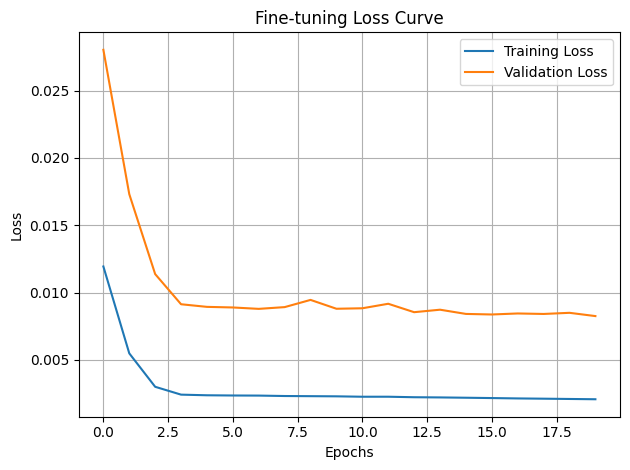

In [4]:
fine_tune_btc_model_v2(
    model_path="/content/drive/MyDrive/BTC_Prediction_Training/Trained_Model/btc_lstm_model.h5",
    scaler_path="/content/drive/MyDrive/BTC_Prediction_Training/Trained_Model/btc_scaler.save",
    new_data_path="/content/drive/MyDrive/BTC_Prediction_Training/data/btc_March_2_till_July_27.csv",
    save_path="/content/drive/MyDrive/BTC_Prediction_Training/Trained_Model/btc_lstm_model_v2.h5",  # New version
    epochs=20,
    batch_size=8,
    plot_loss=True
)
